In [1]:
%%capture
!pip install nltk

In [2]:
import warnings
warnings.filterwarnings('ignore')

import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2' 

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Dense

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\RICKY\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


In [39]:
def prepare_data():
    try:
        data = pd.read_csv("E:/2023/Data Science Cert/Machine Learning/Deep Learning/spam.csv", encoding='latin-1')
    except FileNotFoundError:
        print("Data file not found, make sure it's downloaded.")
        
    data.drop(['Unnamed: 2','Unnamed: 3','Unnamed: 4'], axis=1, inplace=True)
    data.rename(columns={"v1": "label", "v2": "text"}, inplace=True)
    data.label = data['label'].map({'ham':0, 'spam':1})
    data['Count'] = data['text'].apply(lambda x: len(x))
    
    sw=stopwords.words("english")
    vectorizer = TfidfVectorizer(stop_words=sw, binary=True)

    X = vectorizer.fit_transform(data.text).toarray()
    y = data.label
    
    return X, y
    

In [4]:
def plot_metrics(history):
    fig = plt.figure(figsize=(10,5))
    for i, metric in enumerate(['accuracy', 'loss']):
        train_metrics = history.history[metric]
        val_metrics = history.history['val_'+metric]
        epochs = range(1, len(train_metrics) + 1)
        plt.subplot(1,2,i+1)
        plt.plot(epochs, train_metrics)
        plt.plot(epochs, val_metrics)
        plt.title('Training and validation '+ metric)
        plt.xlabel("Epochs")
        plt.ylabel(metric)
        plt.legend(["train_"+metric, 'val_'+metric])

In [6]:
tf.keras.regularizers.l2(l=0.01) 

In [7]:
dense_layer=Dense(32,activation='relu', kernel_regularizer=tf.keras.regularizers.l2(l=0.01))

In [8]:
dense_layer = Dense(32, 
                activation="relu", 
                kernel_regularizer="l1")

In [9]:
from tensorflow.keras.layers import Dropout
dropout_layer= Dropout(rate=0.2)

In [10]:
from tensorflow.keras.layers import Dense, BatchNormalization

batchnorm_layer=BatchNormalization()

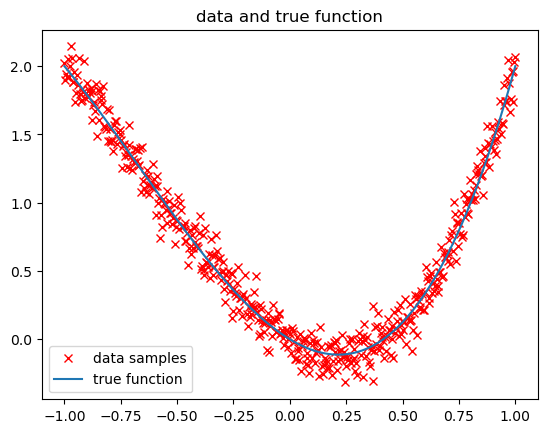

In [11]:
def generate_data(seed=43,std=0.1,samples=500):
    np.random.seed(seed)
    X =np.linspace(-1,1,samples)
    f = X**3 +2*X**2 -X 
    y=f+np.random.randn(samples)*std
    
    return X, y


X,y = generate_data()
f = X**3 +2*X**2 -X
plt.plot(X, y,'rx',label="data samples")
plt.plot(X, f,label="true function")
plt.title("data and true function")
plt.legend()
plt.show()

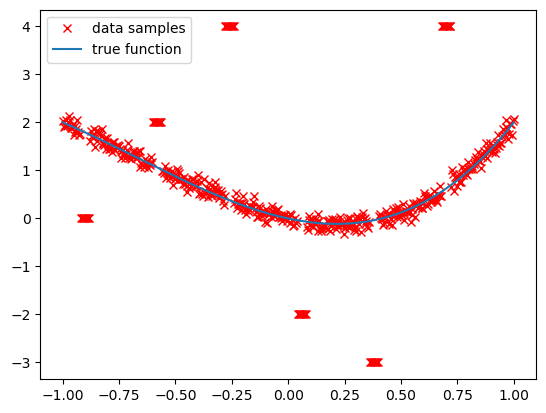

In [12]:
y[20:30] = 0
y[100:110] = 2
y[180:190] = 4
y[260:270] = -2
y[340:350] = -3
y[420:430] = 4

plt.plot(X, y,'rx',label="data samples")
plt.plot(X, f,label="true function")
plt.legend()
plt.show()

In [13]:
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam

model = Sequential()
model.add(Dense(1000, activation='relu',input_shape=(1,)))
model.add(Dense(120,activation='relu'))
model.add(Dense(120,activation='relu'))
model.add(Dense(1))

model.compile(optimizer=Adam(lr=1e-3), loss="mean_squared_error")
model.fit(X, y,  epochs=20, batch_size=100)


Epoch 1/20



5/5 [==============================] - 2s 9ms/step - loss: 1.5358
Epoch 2/20
5/5 [==============================] - 0s 8ms/step - loss: 1.1527
Epoch 3/20
5/5 [==============================] - 0s 7ms/step - loss: 0.9731
Epoch 4/20
5/5 [==============================] - 0s 7ms/step - loss: 0.9620
Epoch 5/20
5/5 [==============================] - 0s 9ms/step - loss: 0.9058
Epoch 6/20
5/5 [==============================] - 0s 8ms/step - loss: 0.8836
Epoch 7/20
5/5 [==============================] - 0s 8ms/step - loss: 0.8478
Epoch 8/20
5/5 [==============================] - 0s 20ms/step - loss: 0.8135
Epoch 9/20
5/5 [==============================] - 0s 9ms/step - loss: 0.7983
Epoch 10/20
5/5 [==============================] - 0s 7ms/step - loss: 0.7700
Epoch 11/20
5/5 [==============================] - 0s 7ms/step - loss: 0.7604
Epoch 12/20
5/5 [==============================] - 0s 7ms/step - loss: 0.7457
Epoch 13/20
5/5 [==============================] - 0s 8ms/step - loss: 0.7381
Epoch

16/16 [==============================] - 0s 3ms/step


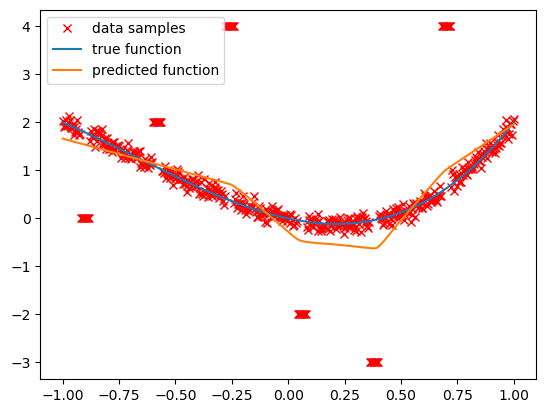

In [14]:
y_pred = model.predict(X)
plt.plot(X, y,'rx',label="data samples")
plt.plot(X, f,label="true function")
plt.plot(X, y_pred ,label="predicted function")
plt.legend()
plt.show()

In [15]:
no_reg = np.mean((y-y_pred)**2)
print(f"Mean squared error is {no_reg}\n")

Mean squared error is 1.9270132739255694



In [16]:
model_l1 = Sequential()

model_l1.add(Dense(1000, activation='relu',input_shape=(1,),kernel_regularizer=keras.regularizers.l1(l=0.01)))
model_l1.add(Dense(120,activation='relu',kernel_regularizer=keras.regularizers.l1(l=0.001)))
model_l1.add(Dense(120,activation='relu'))
model_l1.add(Dense(1))
model_l1.compile(optimizer=Adam(lr=1e-3), loss="mean_squared_error")
model_l1.fit(X, y,  epochs=20, batch_size=100)

Epoch 1/20
5/5 [==============================] - 2s 5ms/step - loss: 6.2426
Epoch 2/20
5/5 [==============================] - 0s 7ms/step - loss: 5.4833
Epoch 3/20
5/5 [==============================] - 0s 7ms/step - loss: 4.7819
Epoch 4/20
5/5 [==============================] - 0s 6ms/step - loss: 4.2213
Epoch 5/20
5/5 [==============================] - 0s 5ms/step - loss: 3.7990
Epoch 6/20
5/5 [==============================] - 0s 7ms/step - loss: 3.3736
Epoch 7/20
5/5 [==============================] - 0s 7ms/step - loss: 3.0053
Epoch 8/20
5/5 [==============================] - 0s 7ms/step - loss: 2.6671
Epoch 9/20
5/5 [==============================] - 0s 7ms/step - loss: 2.3649
Epoch 10/20
5/5 [==============================] - 0s 7ms/step - loss: 2.1021
Epoch 11/20
5/5 [==============================] - 0s 7ms/step - loss: 1.8684
Epoch 12/20
5/5 [==============================] - 0s 7ms/step - loss: 1.6747
Epoch 13/20
5/5 [==============================] - 0s 6ms/step - loss: 1.

16/16 [==============================] - 0s 4ms/step


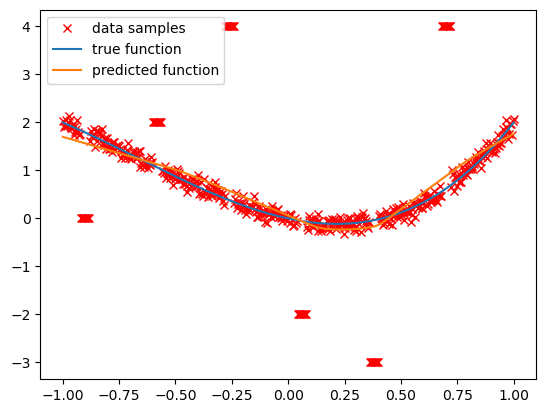

In [17]:
y_pred = model_l1.predict(X)
plt.plot(X, y,'rx',label="data samples")
plt.plot(X, f,label="true function")
plt.plot(X, y_pred,label="predicted function")
plt.legend()
plt.show()

In [18]:
l1 = np.mean((y-y_pred)**2)
print(f"Mean squared error is {l1}\n")

Mean squared error is 1.6945591378780922



In [19]:
model_l2 = Sequential()

model_l2.add(Dense(1000, activation='relu',input_shape=(1,),kernel_regularizer=keras.regularizers.l2(l=0.0001)))
model_l2.add(Dense(120,activation='relu',kernel_regularizer=keras.regularizers.l2(l=0.0001)))
model_l2.add(Dense(120,activation='relu',kernel_regularizer=keras.regularizers.l2(l=0.0001)))
model_l2.add(Dense(1))
model_l2.compile(optimizer=Adam(lr=1e-3), loss="mean_squared_error")
model_l2.fit(X, y, validation_split=0.2, epochs=20, batch_size=40)

Epoch 1/20
10/10 [==============================] - 2s 56ms/step - loss: 1.2284 - val_loss: 4.4862
Epoch 2/20
10/10 [==============================] - 0s 10ms/step - loss: 0.7559 - val_loss: 5.3181
Epoch 3/20
10/10 [==============================] - 0s 9ms/step - loss: 0.7338 - val_loss: 4.2833
Epoch 4/20
10/10 [==============================] - 0s 9ms/step - loss: 0.7110 - val_loss: 4.2493
Epoch 5/20
10/10 [==============================] - 0s 10ms/step - loss: 0.7030 - val_loss: 4.6064
Epoch 6/20
10/10 [==============================] - 0s 9ms/step - loss: 0.6947 - val_loss: 4.2212
Epoch 7/20
10/10 [==============================] - 0s 12ms/step - loss: 0.6836 - val_loss: 3.8238
Epoch 8/20
10/10 [==============================] - 0s 11ms/step - loss: 0.6774 - val_loss: 3.5925
Epoch 9/20
10/10 [==============================] - 0s 13ms/step - loss: 0.6711 - val_loss: 3.3726
Epoch 10/20
10/10 [==============================] - 0s 11ms/step - loss: 0.6745 - val_loss: 3.2919
Epoch 11/20


16/16 [==============================] - 0s 3ms/step


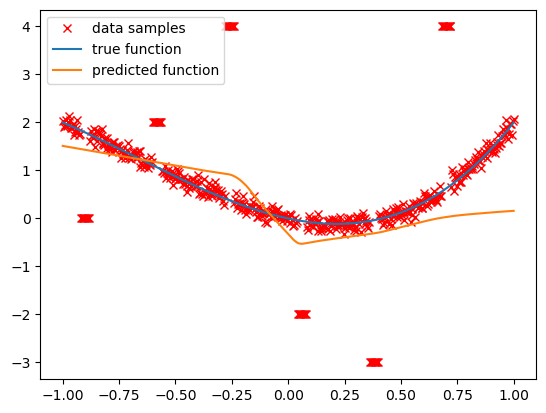

In [20]:
y_pred = model_l2.predict(X)
plt.plot(X, y,'rx',label="data samples")
plt.plot(X, f,label="true function")
plt.plot(X, y_pred ,label="predicted function")
plt.legend()

In [21]:
model_dp = Sequential()

model_dp.add(Dense(1000, activation='relu',input_shape=(1,)))
model_dp.add(Dropout(0.1))
model_dp.add(Dense(120,activation='relu'))
model_dp.add(Dropout(0.1))
model_dp.add(Dense(120,activation='relu'))
model_dp.add(Dropout(0.1))
model_dp.add(Dense(1))
model_dp.compile(optimizer=Adam(lr=1e-3), loss="mean_squared_error")
model_dp.fit(X, y, validation_split=0.2, epochs=20, batch_size=40)

Epoch 1/20
10/10 [==============================] - 2s 39ms/step - loss: 1.1679 - val_loss: 3.7959
Epoch 2/20
10/10 [==============================] - 0s 15ms/step - loss: 0.7323 - val_loss: 4.3000
Epoch 3/20
10/10 [==============================] - 0s 14ms/step - loss: 0.7527 - val_loss: 4.5548
Epoch 4/20
10/10 [==============================] - 0s 11ms/step - loss: 0.7255 - val_loss: 4.2084
Epoch 5/20
10/10 [==============================] - 0s 11ms/step - loss: 0.7181 - val_loss: 4.5036
Epoch 6/20
10/10 [==============================] - 0s 12ms/step - loss: 0.6938 - val_loss: 4.1248
Epoch 7/20
10/10 [==============================] - 0s 12ms/step - loss: 0.6908 - val_loss: 3.7633
Epoch 8/20
10/10 [==============================] - 0s 14ms/step - loss: 0.6804 - val_loss: 3.7843
Epoch 9/20
10/10 [==============================] - 0s 13ms/step - loss: 0.6720 - val_loss: 3.1844
Epoch 10/20
10/10 [==============================] - 0s 13ms/step - loss: 0.6526 - val_loss: 3.3567
Epoch 11/

16/16 [==============================] - 0s 3ms/step


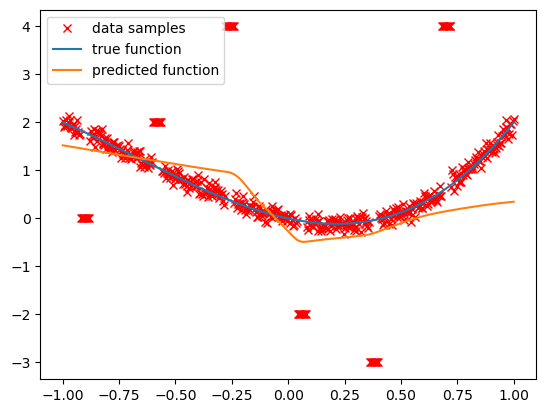

In [22]:
y_pred = model_dp.predict(X)
plt.plot(X, y,'rx',label="data samples")
plt.plot(X, f,label="true function")
plt.plot(X, y_pred ,label="predicted function")
plt.legend()

In [23]:
dp = np.mean((y-y_pred)**2)
print(f"Mean squared error is {dp}\n")

Mean squared error is 1.7981736727203714



In [24]:
model_bn = Sequential()

model_bn.add(Dense(1000, activation='relu',input_shape=(1,)))
model_bn.add(BatchNormalization())
model_bn.add(Dense(120,activation='relu'))

model_bn.add(Dense(120,activation='relu'))
model_bn.add(Dense(1))
model_bn.compile(optimizer=Adam(lr=1e-3), loss="mean_squared_error")
model_bn.fit(X, y, validation_split=0.2, epochs=20, batch_size=40)

Epoch 1/20
10/10 [==============================] - 2s 39ms/step - loss: 1.0808 - val_loss: 2.7870
Epoch 2/20
10/10 [==============================] - 0s 10ms/step - loss: 0.7401 - val_loss: 2.8337
Epoch 3/20
10/10 [==============================] - 0s 10ms/step - loss: 0.7443 - val_loss: 2.8275
Epoch 4/20
10/10 [==============================] - 0s 12ms/step - loss: 0.6654 - val_loss: 2.7802
Epoch 5/20
10/10 [==============================] - 0s 11ms/step - loss: 0.6795 - val_loss: 2.7494
Epoch 6/20
10/10 [==============================] - 0s 12ms/step - loss: 0.7289 - val_loss: 2.7380
Epoch 7/20
10/10 [==============================] - 0s 11ms/step - loss: 0.7433 - val_loss: 2.7070
Epoch 8/20
10/10 [==============================] - 0s 11ms/step - loss: 0.6586 - val_loss: 2.7120
Epoch 9/20
10/10 [==============================] - 0s 12ms/step - loss: 0.7271 - val_loss: 2.7390
Epoch 10/20
10/10 [==============================] - 0s 11ms/step - loss: 0.7912 - val_loss: 2.8696
Epoch 11/

16/16 [==============================] - 0s 3ms/step


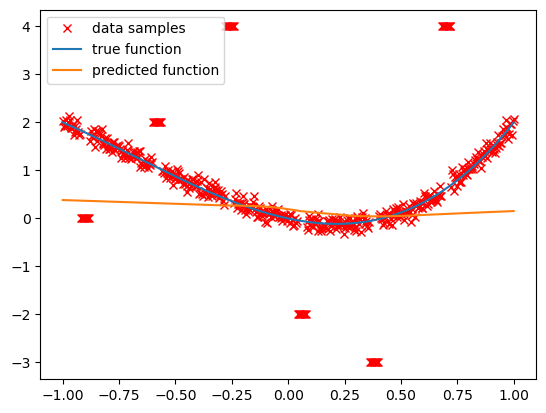

In [25]:
y_pred = model_bn.predict(X)
plt.plot(X, y,'rx',label="data samples")
plt.plot(X, f,label="true function")
plt.plot(X, y_pred ,label="predicted function")
plt.legend()

In [26]:
model_sh = Sequential()

model_sh.add(Dense(1000, activation='relu',input_shape=(1,)))
model_sh.add(Dense(120,activation='relu'))
model_sh.add(Dense(120,activation='relu'))
model_sh.add(Dense(1))

model_sh.compile(optimizer=Adam(lr=1e-3), loss="mean_squared_error")
model_sh.fit(X, y, validation_split=0.2, epochs=20, batch_size=40,shuffle=True)

Epoch 1/20
10/10 [==============================] - 2s 33ms/step - loss: 1.2851 - val_loss: 4.2326
Epoch 2/20
10/10 [==============================] - 0s 9ms/step - loss: 0.7895 - val_loss: 5.1051
Epoch 3/20
10/10 [==============================] - 0s 9ms/step - loss: 0.6979 - val_loss: 4.1886
Epoch 4/20
10/10 [==============================] - 0s 9ms/step - loss: 0.6886 - val_loss: 3.7316
Epoch 5/20
10/10 [==============================] - 0s 17ms/step - loss: 0.6809 - val_loss: 4.4679
Epoch 6/20
10/10 [==============================] - 0s 11ms/step - loss: 0.6740 - val_loss: 3.6315
Epoch 7/20
10/10 [==============================] - 0s 9ms/step - loss: 0.6588 - val_loss: 3.7928
Epoch 8/20
10/10 [==============================] - 0s 16ms/step - loss: 0.6530 - val_loss: 3.5139
Epoch 9/20
10/10 [==============================] - 0s 9ms/step - loss: 0.6496 - val_loss: 3.2619
Epoch 10/20
10/10 [==============================] - 0s 11ms/step - loss: 0.6437 - val_loss: 2.9947
Epoch 11/20
10

16/16 [==============================] - 0s 3ms/step


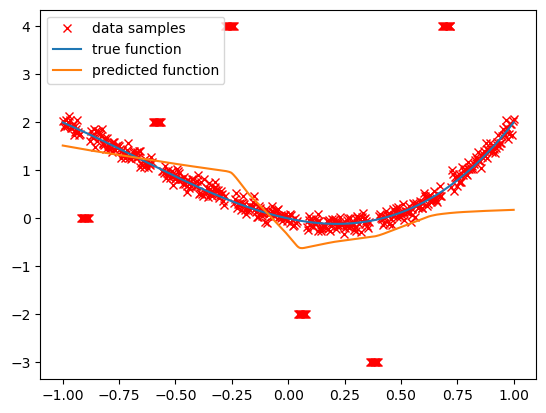

In [27]:
y_pred = model_sh.predict(X)

plt.plot(X, y,'rx',label="data samples")
plt.plot(X, f,label="true function")
plt.plot(X, y_pred ,label="predicted function")
plt.legend()

In [28]:
sh = np.mean((y-y_pred)**2)
print(f"Mean squared error is {sh}\n")

Mean squared error is 1.8752736795160188



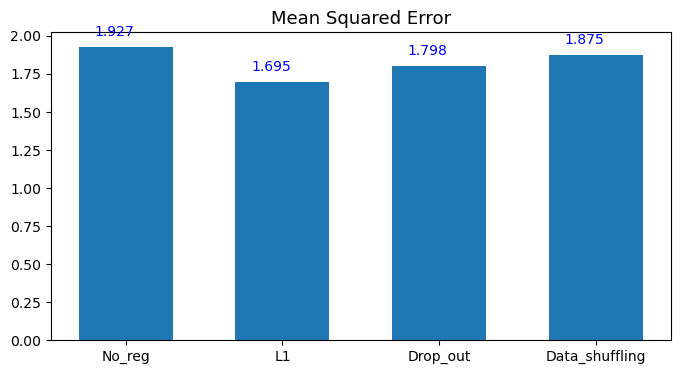

In [33]:
names = ['No_reg','L1','Drop_out','Data_shuffling']
error = [no_reg, l1, dp, sh]

plt.figure(figsize=(8, 4))
plt.bar(names, error, width=0.6)
plt.title("Mean Squared Error", fontsize=13)

for i, err in enumerate(error):
    plt.text(i-0.2, err+0.1, str(round(err,3)), color='blue', va='center') 

In [36]:
data = pd.read_csv("E:/2023/Data Science Cert/Machine Learning/Deep Learning/spam.csv", encoding="latin-1")
data.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [41]:
X, y = prepare_data()
X.shape, y.shape

((5572, 8536), (5572,))

In [42]:
input_dim = X.shape[1]
   
def get_model(reg=None, epochs=10):
    model = Sequential()
    model.add(Dense(512, activation='relu', input_shape=(input_dim,)))
    if reg=="L1":
        model.add(Dense(256, activation='relu', kernel_regularizer="l1"))
        model.add(Dense(64, activation='relu', kernel_regularizer="l1"))
    elif reg=="L2":
        model.add(Dense(256, activation='relu', kernel_regularizer="l2"))
        model.add(Dense(64, activation='relu', kernel_regularizer="l2"))
    elif reg=="Dropout":
        model.add(Dropout(0.2))
        model.add(Dense(256, activation='relu'))
        model.add(Dropout(0.2))
        model.add(Dense(64, activation='relu'))
        model.add(Dropout(0.2))
    elif reg=="BatchNorm":
        model.add(BatchNormalization())
        model.add(Dense(256, activation='relu'))
        model.add(BatchNormalization())
        model.add(Dense(64, activation='relu'))
        model.add(BatchNormalization())  
    else:
        model.add(Dense(256, activation='relu'))
        model.add(Dense(64, activation='relu'))  
 
    model.add(Dense(1, activation='sigmoid'))
    model.compile(loss="binary_crossentropy", optimizer="adam",
                 metrics=["accuracy"])
    history = model.fit(X, y, batch_size=64, validation_split=0.2,
              epochs=epochs)
    plot_metrics(history)

Epoch 1/10



70/70 [==============================] - 8s 80ms/step - loss: 0.2655 - accuracy: 0.8661 - val_loss: 0.1319 - val_accuracy: 0.9713
Epoch 2/10
70/70 [==============================] - 5s 72ms/step - loss: 0.0538 - accuracy: 0.9924 - val_loss: 0.0888 - val_accuracy: 0.9767
Epoch 3/10
70/70 [==============================] - 5s 74ms/step - loss: 0.0030 - accuracy: 0.9991 - val_loss: 0.0847 - val_accuracy: 0.9794
Epoch 4/10
70/70 [==============================] - 5s 73ms/step - loss: 6.3153e-04 - accuracy: 0.9998 - val_loss: 0.1098 - val_accuracy: 0.9794
Epoch 5/10
70/70 [==============================] - 5s 70ms/step - loss: 1.6287e-04 - accuracy: 1.0000 - val_loss: 0.1095 - val_accuracy: 0.9776
Epoch 6/10
70/70 [==============================] - 5s 73ms/step - loss: 9.2410e-05 - accuracy: 1.0000 - val_loss: 0.1137 - val_accuracy: 0.9776
Epoch 7/10
70/70 [==============================] - 5s 75ms/step - loss: 6.2149e-05 - accuracy: 1.0000 - val_loss: 0.1176 - val_accuracy: 0.9776
Epoch 8/

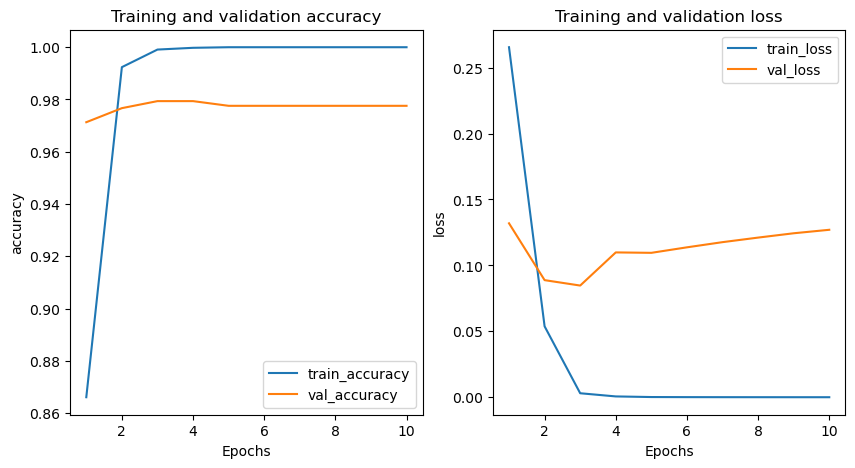

In [43]:
get_model()

Epoch 1/10
70/70 [==============================] - 7s 74ms/step - loss: 32.2088 - accuracy: 0.8652 - val_loss: 6.4426 - val_accuracy: 0.8700
Epoch 2/10
70/70 [==============================] - 5s 73ms/step - loss: 2.0724 - accuracy: 0.8649 - val_loss: 0.6417 - val_accuracy: 0.8700
Epoch 3/10
70/70 [==============================] - 5s 68ms/step - loss: 0.5894 - accuracy: 0.8649 - val_loss: 0.5662 - val_accuracy: 0.8700
Epoch 4/10
70/70 [==============================] - 5s 67ms/step - loss: 0.5733 - accuracy: 0.8649 - val_loss: 0.5626 - val_accuracy: 0.8700
Epoch 5/10
70/70 [==============================] - 5s 66ms/step - loss: 0.5729 - accuracy: 0.8649 - val_loss: 0.5640 - val_accuracy: 0.8700
Epoch 6/10
70/70 [==============================] - 5s 71ms/step - loss: 0.5728 - accuracy: 0.8649 - val_loss: 0.5635 - val_accuracy: 0.8700
Epoch 7/10
70/70 [==============================] - 5s 72ms/step - loss: 0.5731 - accuracy: 0.8649 - val_loss: 0.5630 - val_accuracy: 0.8700
Epoch 8/10
7

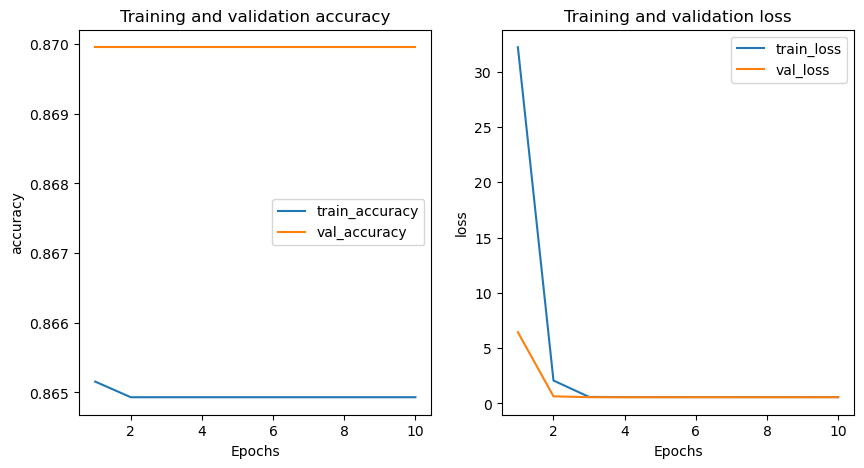

In [44]:
get_model(reg="L1")

Epoch 1/10
70/70 [==============================] - 6s 70ms/step - loss: 2.0944 - accuracy: 0.8638 - val_loss: 0.5500 - val_accuracy: 0.9623
Epoch 2/10
70/70 [==============================] - 5s 73ms/step - loss: 0.2563 - accuracy: 0.9859 - val_loss: 0.1549 - val_accuracy: 0.9812
Epoch 3/10
70/70 [==============================] - 5s 68ms/step - loss: 0.0884 - accuracy: 0.9973 - val_loss: 0.1184 - val_accuracy: 0.9776
Epoch 4/10
70/70 [==============================] - 5s 68ms/step - loss: 0.0598 - accuracy: 0.9989 - val_loss: 0.1127 - val_accuracy: 0.9749
Epoch 5/10
70/70 [==============================] - 5s 72ms/step - loss: 0.0480 - accuracy: 0.9996 - val_loss: 0.0938 - val_accuracy: 0.9821
Epoch 6/10
70/70 [==============================] - 5s 72ms/step - loss: 0.0401 - accuracy: 0.9998 - val_loss: 0.0918 - val_accuracy: 0.9776
Epoch 7/10
70/70 [==============================] - 5s 77ms/step - loss: 0.0348 - accuracy: 0.9998 - val_loss: 0.0856 - val_accuracy: 0.9803
Epoch 8/10
70

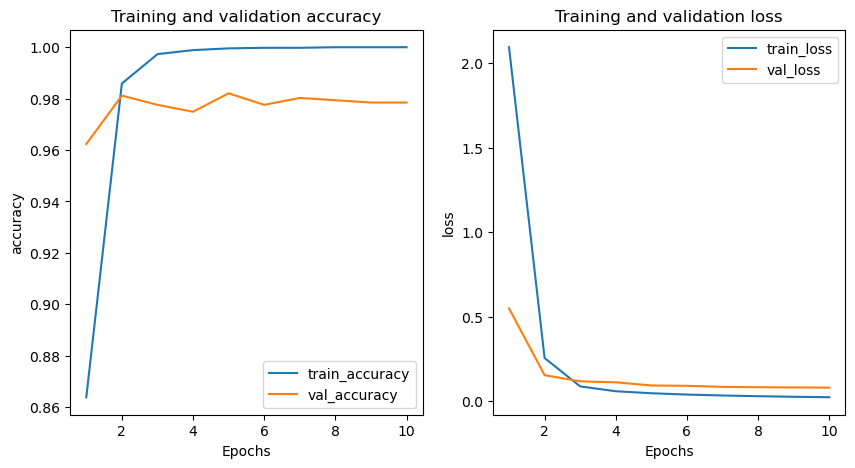

In [45]:
get_model(reg="L2")

Epoch 1/10
70/70 [==============================] - 7s 80ms/step - loss: 0.2871 - accuracy: 0.8553 - val_loss: 0.1401 - val_accuracy: 0.8924
Epoch 2/10
70/70 [==============================] - 5s 73ms/step - loss: 0.0685 - accuracy: 0.9865 - val_loss: 0.0638 - val_accuracy: 0.9803
Epoch 3/10
70/70 [==============================] - 5s 73ms/step - loss: 0.0047 - accuracy: 0.9987 - val_loss: 0.0767 - val_accuracy: 0.9812
Epoch 4/10
70/70 [==============================] - 5s 74ms/step - loss: 8.3032e-04 - accuracy: 0.9998 - val_loss: 0.0936 - val_accuracy: 0.9812
Epoch 5/10
70/70 [==============================] - 5s 73ms/step - loss: 1.9921e-04 - accuracy: 1.0000 - val_loss: 0.1046 - val_accuracy: 0.9812
Epoch 6/10
70/70 [==============================] - 5s 70ms/step - loss: 1.2383e-04 - accuracy: 1.0000 - val_loss: 0.1109 - val_accuracy: 0.9812
Epoch 7/10
70/70 [==============================] - 5s 72ms/step - loss: 8.6279e-05 - accuracy: 1.0000 - val_loss: 0.1163 - val_accuracy: 0.98

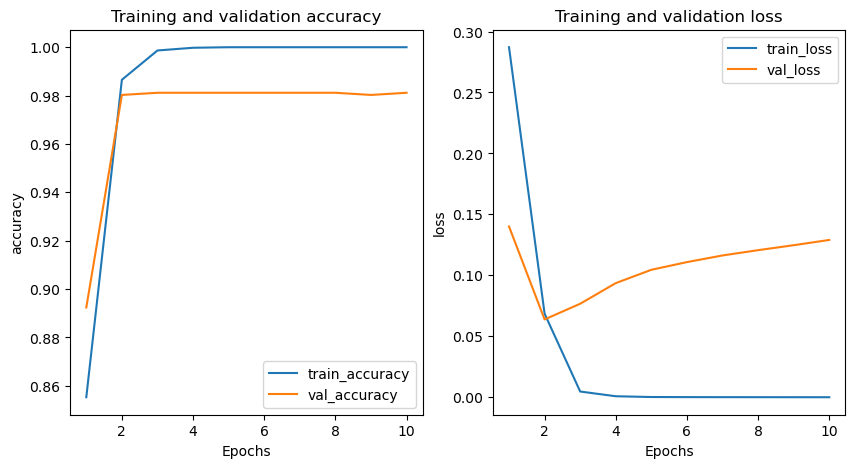

In [46]:
get_model(reg="Dropout")

Epoch 1/10
70/70 [==============================] - 8s 86ms/step - loss: 0.2647 - accuracy: 0.8735 - val_loss: 0.1323 - val_accuracy: 0.9695
Epoch 2/10
70/70 [==============================] - 5s 76ms/step - loss: 0.0558 - accuracy: 0.9928 - val_loss: 0.0774 - val_accuracy: 0.9794
Epoch 3/10
70/70 [==============================] - 5s 71ms/step - loss: 0.0031 - accuracy: 0.9993 - val_loss: 0.0821 - val_accuracy: 0.9803
Epoch 4/10
70/70 [==============================] - 5s 71ms/step - loss: 6.4778e-04 - accuracy: 0.9998 - val_loss: 0.1070 - val_accuracy: 0.9785
Epoch 5/10
70/70 [==============================] - 5s 72ms/step - loss: 1.6703e-04 - accuracy: 1.0000 - val_loss: 0.1102 - val_accuracy: 0.9785
Epoch 6/10
70/70 [==============================] - 5s 77ms/step - loss: 9.1679e-05 - accuracy: 1.0000 - val_loss: 0.1148 - val_accuracy: 0.9776
Epoch 7/10
70/70 [==============================] - 5s 75ms/step - loss: 5.8383e-05 - accuracy: 1.0000 - val_loss: 0.1193 - val_accuracy: 0.97

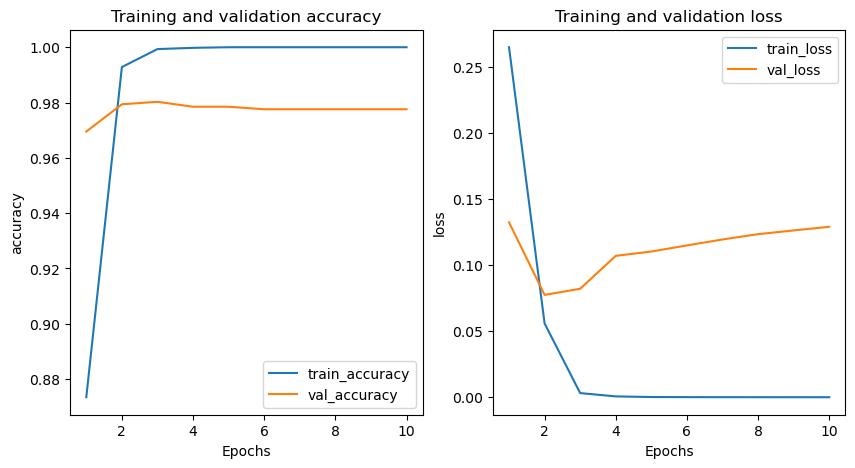

In [47]:
get_model(reg="BathNorm")